In [13]:
import pandas as pd
df = pd.read_csv("D:\\innobyte services\\Amazon Sale Report.csv")

In [15]:
import pandas as pd
df = pd.read_csv(r"D:\innobyte services\Amazon Sale Report.csv")

In [16]:
import pandas as pd
df = pd.read_csv(r"D:\innobyte services\Amazon Sale Report.csv")
print(df.head())  # Display first few rows to confirm

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [17]:
import pandas as pd
import os

# 1. Load the Dataset
file_path = r"D:\innobyte services\Amazon Sale Report.csv"
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    df = pd.read_csv(file_path)

    # 2. View the First Few Rows
    print(df.head())
    print(df.info())  # Check data types and missing values

    # 3. Drop Unnecessary Columns
    print(df.columns)
    df = df.drop(columns=['index', 'New', 'PendingS'], errors='ignore')

    # 4. Fix the Date Column
    print(df['Date'].head())  # Verify date format
    df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%y", errors='coerce')

    # 5. Handle Missing Values
    print(df[['Amount', 'currency', 'fulfilled-by']].isna().sum())  # Check missing values
    df = df.dropna(subset=['Amount', 'currency'])
    df['fulfilled-by'] = df['fulfilled-by'].fillna('Unknown')

    # 6. Format Postal Codes and Text Fields
    print(df['ship-postal-code'].head())  # Verify postal code format
    df['ship-postal-code'] = df['ship-postal-code'].astype('string')
    df['ship-postal-code'] = df['ship-postal-code'].fillna('Unknown')
    df['ship-city'] = df['ship-city'].str.title()
    df['ship-state'] = df['ship-state'].str.upper()
    df['Category'] = df['Category'].str.title()

    # 7. Create Extra Time Features
    df['Month'] = df['Date'].dt.to_period('M')  # e.g., 2022-04
    print(df[['Date', 'Month']].head())  # Verify new column

    # Final Output
    print("Cleaned DataFrame:")
    print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [20]:
df.to_csv("D:\\innobyte services\\Cleaned_Amazon_Sales_Report.csv", index=False)


In [23]:
print(df.columns)


Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'Month'],
      dtype='object')


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df = pd.read_csv(r"D:\innobyte services\Cleaned_Amazon_Sales_Report.csv")

In [31]:
# Total unique orders
total_orders = df['Order ID'].nunique()

# Total quantity sold
total_quantity = df['Qty'].sum()

# Total revenue
total_revenue = df['Amount'].sum()

print(f"Total Orders: {total_orders}")
print(f"Total Quantity Sold: {total_quantity}")
print(f"Total Revenue: ₹{total_revenue}")


Total Orders: 112887
Total Quantity Sold: 116479
Total Revenue: ₹78590170.25


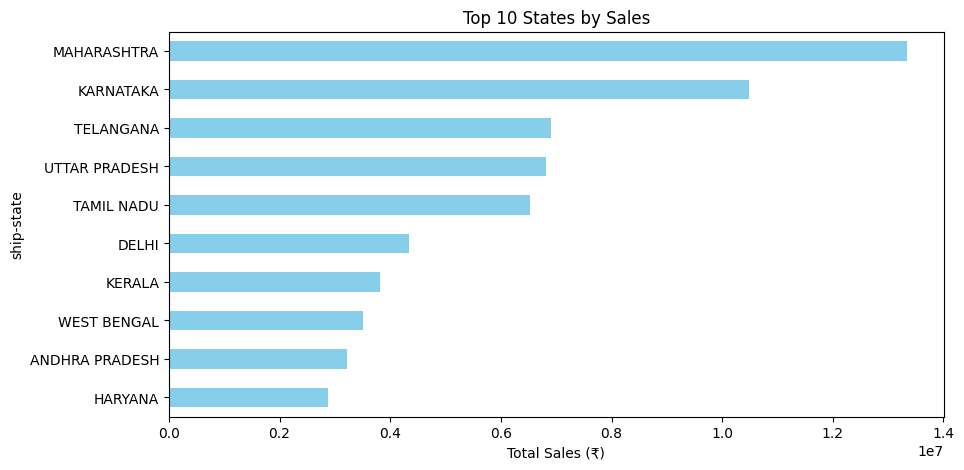

In [32]:
# Top 10 states by sales
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='barh', figsize=(10,5), color='skyblue')
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales (₹)')
plt.gca().invert_yaxis()
plt.show()


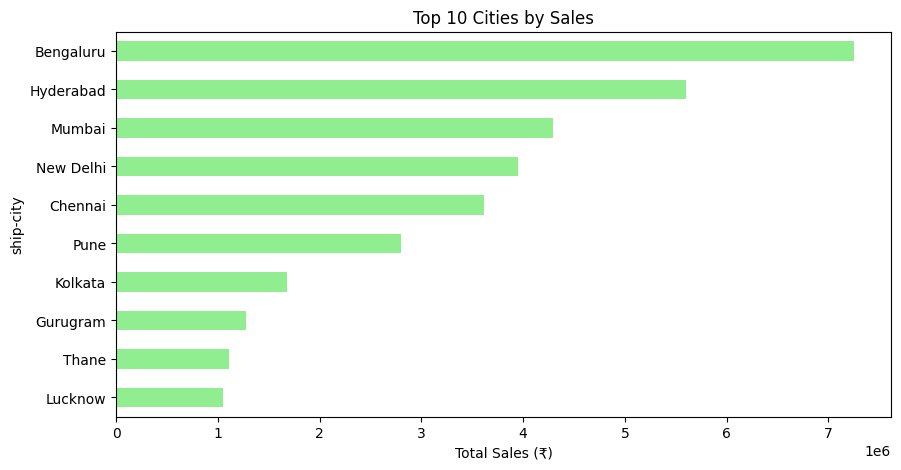

In [33]:
# Top 10 cities by sales
top_cities = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='barh', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales (₹)')
plt.gca().invert_yaxis()
plt.show()


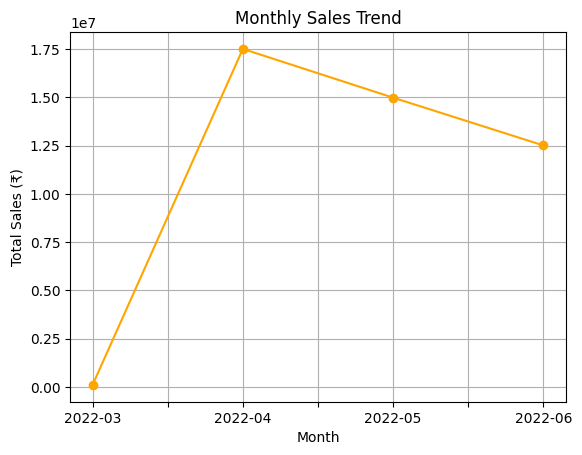

In [34]:
monthly_sales = df.groupby('Month')['Amount'].sum().sort_index()
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (₹)')
plt.grid(True)
plt.show()


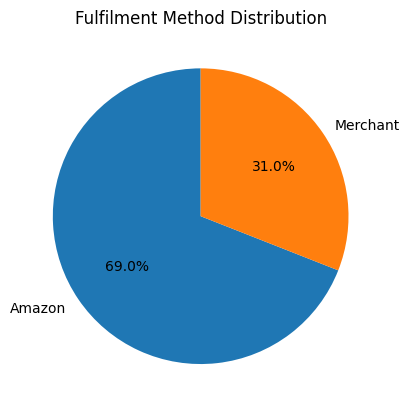

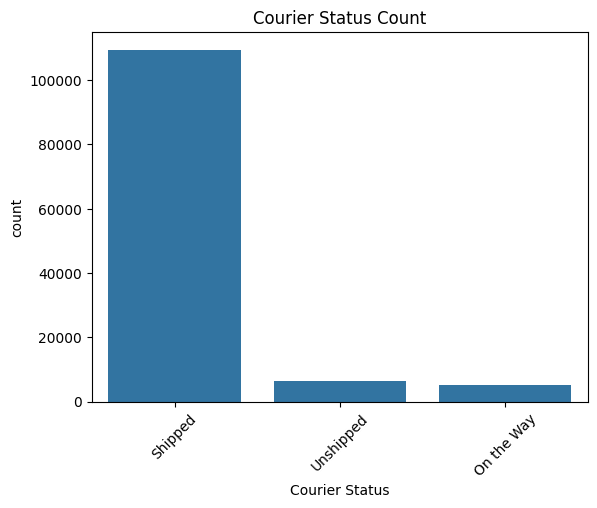

In [35]:
# Fulfilment method count
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Fulfilment Method Distribution')
plt.ylabel('')
plt.show()

# Courier Status distribution
sns.countplot(data=df, x='Courier Status', order=df['Courier Status'].value_counts().index)
plt.title('Courier Status Count')
plt.xticks(rotation=45)
plt.show()


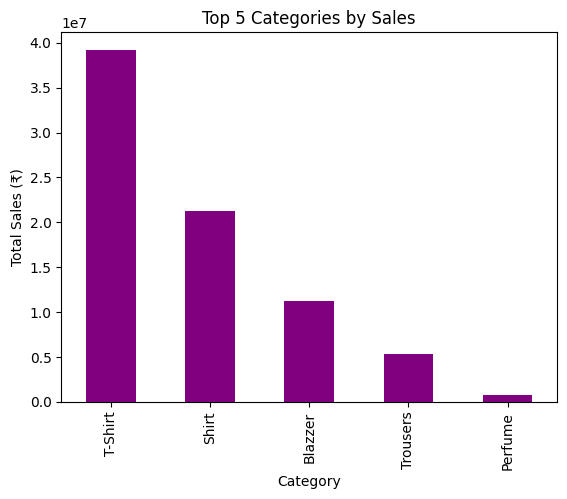

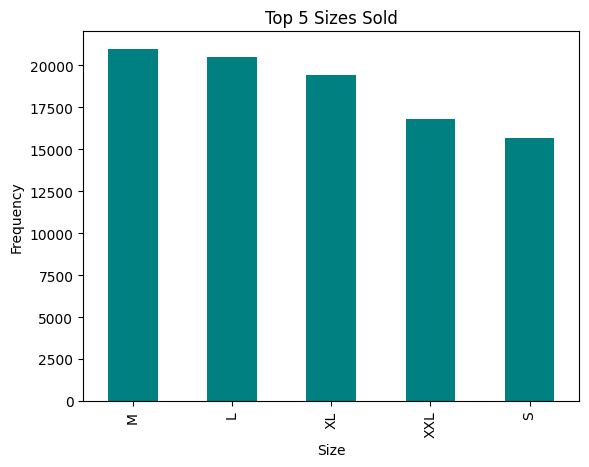

In [36]:
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
top_categories.plot(kind='bar', color='purple')
plt.title('Top 5 Categories by Sales')
plt.ylabel('Total Sales (₹)')
plt.show()

top_sizes = df['Size'].value_counts().head(5)
top_sizes.plot(kind='bar', color='teal')
plt.title('Top 5 Sizes Sold')
plt.ylabel('Frequency')
plt.show()


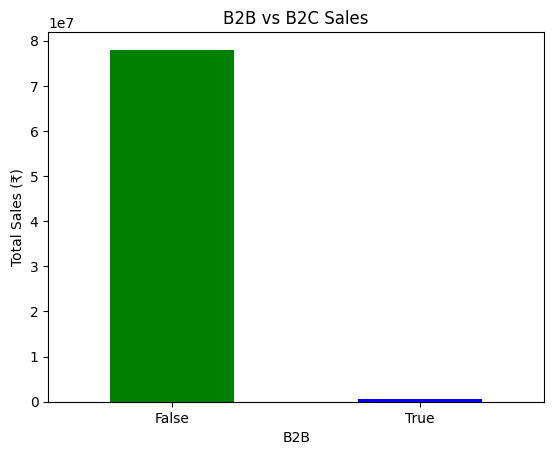

In [37]:
b2b_sales = df.groupby('B2B')['Amount'].sum()
b2b_sales.plot(kind='bar', color=['green', 'blue'])
plt.title('B2B vs B2C Sales')
plt.xticks(rotation=0)
plt.ylabel('Total Sales (₹)')
plt.show()
